In [1]:
from fpm import *
from params import *
import pandas as pd
import numpy as np
import torch
import scipy.io as io
import cv2

from utils import get_label


In [2]:
models = {
    '64_raw': ('models/frcnn_64_raw', False),
    '64_pre': ('models/frcnn_64_pre', True),
    '128_raw': ('models/frcnn_128_raw', False),
    '128_pre': ('models/frcnn_128_pre', True),
    '256_raw': ('models/frcnn_256_raw', False),
    '256_pre': ('models/frcnn_256_pre', True),
    '512_raw': ('models/frcnn_512_raw', False),
    '512_pre': ('models/frcnn_512_pre', True),
    'multisize_raw': ('models/frcnn_multisize_raw', False),
}

In [3]:
model = '64_raw'  # ['64_raw', '64_pre', '128_raw', '128_pre', '256_raw', '256_pre', '512_raw', '512_pre', 'multisize_raw']

cfg_path, preprocess_fft = models[model]
cfg = pickle.load(open(os.path.join(cfg_path, 'cfg.pkl'), 'rb'))
cfg.MODEL.WEIGHTS = os.path.join(cfg_path, 'model_final.pth')
predictor = Predictor(cfg, preprocess_fft=preprocess_fft)

In [5]:
tiff_path = 'tiffs/4.2.03_128.tiff'
img = read_tiff(tiff_path)[0]
img = torch.from_numpy(img).cuda()
img = [
    {
        'image': img,
    }
]

predictor.model(img)[0]['instances']

Instances(num_instances=1, image_height=128, image_width=128, fields=[pred_boxes: Boxes(tensor([[  0.0000,   3.9708, 125.3443, 127.8070]], device='cuda:0',
       grad_fn=<IndexBackward>)), scores: tensor([0.4509], device='cuda:0', grad_fn=<IndexBackward>), pred_classes: tensor([0], device='cuda:0')])

### An example tun-through of the available functions

In [ ]:
tiff_path = 'tiffs/4.2.03_128.tiff'
df = pd.read_csv('~/Eval-FPM/data_512/labels.csv')
row = get_label(f'data_512/images/4.2.03.tiff', df, return_row=True)
illumination_params['model'] = '128_raw'  # ['64_raw', '64_pre', '128_raw', '128_pre', '256_raw', '256_pre', '512_raw', '512_pre', 'multisize_raw']
reconstruction_params['scale'] = 2
illumination_params['calibrate'] = False

# Illumination Estimation
discs, radii = get_illumination(tiff_path, **illumination_params)

# Save Illumination Estimation Results
save_illumination(discs, radii, tiff_path, save_params)

# Reconstruction
obj, pupil, imgs = get_reconstruction(tiff_path, discs, row, reconstruction_params)

# Save Reconstruction Results
save_reconstruction(obj, pupil, imgs, tiff_path, save_params)

Loading the model...

In [105]:
tiff_path = '4.2.03_64.tiff'
df = pd.read_csv('~/Eval-FPM/data_512/labels.csv')
row = get_label(f'data_512/images/4.2.03.tiff', df, return_row=True)
row['IMAGESIZE'] = 64
illumination_params['do_psd'] = True
illumination_params['visualize'] = False
illumination_params['model'] = '64_pre'

reconstruction_params['do_psd'] = False
reconstruction_params['window'] = 'tukey'
reconstruction_params['a'] = 0.25
reconstruction_params['n_iters'] = 40

# Illumination Estimation
discs, radii = get_illumination(tiff_path, **illumination_params)

# Save Illumination Estimation Results
# save_illumination(discs, radii, tiff_path, save_params)

# Reconstruction
obj, pupil, imgs = get_reconstruction(tiff_path, discs, row, reconstruction_params)

# Save Reconstruction Results
# save_reconstruction(obj, pupil, imgs, tiff_path, save_params)

/home/suyog_jadhav1_gmail_com/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


Loading the model...Done!


Performing Reconstruction...

Done!


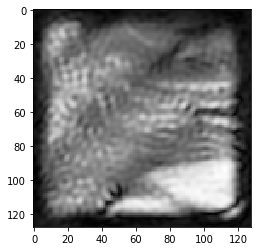

In [106]:
plt.imshow(cp.asnumpy(cp.abs(obj)))

In [107]:
# Save Illumination Estimation Results
save_illumination(discs, radii, tiff_path, save_params)

# Save Reconstruction Results
save_reconstruction(obj, pupil, imgs, tiff_path, save_params)

Saving illumination results...Done!
Saving reconstruction results...Done!
